##Tiny Image Classification Using Convolutional Neural Network (CNN)


In this notebook, we will classify tiny images from the cifar10 dataset. There are a total of ten classes: [airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]. For classification, we'll utilise CNN.

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# load the data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape, X_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
print(y_train.shape)
y_train[:5]

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
#y train is a 2d array, we'll reshape it to a 1d array for our convenience
y_train = y_train.reshape(-1,)
y_train[:5] 

array([6, 9, 9, 4, 1], dtype=uint8)

In [39]:
y_test = y_test.reshape(-1,)

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [94]:
#function to plot the imgs
def plot_sample(X, y, index):
    plt.figure(figsize = (10, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

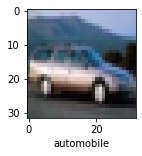

In [95]:
plot_sample(X_train, y_train, 4)

**Normalizing the dataset**

Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize it to the 0-1 range, we need to divide it by 255.

In [43]:

X_train = X_train / 255.0
X_test = X_test / 255.0

**Building a simple artificial neural network for image classification**

In [47]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.8137 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6234 - accuracy: 0.4244
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5405 - accuracy: 0.4595
Epoch 4/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4828 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4359 - accuracy: 0.4951


In [59]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.28      0.40      1000
           1       0.69      0.46      0.55      1000
           2       0.30      0.52      0.38      1000
           3       0.32      0.41      0.36      1000
           4       0.36      0.42      0.39      1000
           5       0.58      0.17      0.26      1000
           6       0.43      0.67      0.52      1000
           7       0.64      0.42      0.51      1000
           8       0.48      0.72      0.58      1000
           9       0.61      0.47      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



With 5 epochs, the accuracy is 49% from ann model.

##Convolutional Neural Network

In [50]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [52]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [53]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
cnn.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
1563/1563 - 87s - loss: 1.4533 - accuracy: 0.4768 - 87s/epoch - 55ms/step
Epoch 2/10
1563/1563 - 86s - loss: 1.0853 - accuracy: 0.6221 - 86s/epoch - 55ms/step
Epoch 3/10
1563/1563 - 88s - loss: 0.9507 - accuracy: 0.6678 - 88s/epoch - 56ms/step
Epoch 4/10
1563/1563 - 89s - loss: 0.8673 - accuracy: 0.6970 - 89s/epoch - 57ms/step
Epoch 5/10
1563/1563 - 88s - loss: 0.7979 - accuracy: 0.7225 - 88s/epoch - 56ms/step
Epoch 6/10
1563/1563 - 88s - loss: 0.7407 - accuracy: 0.7413 - 88s/epoch - 56ms/step
Epoch 7/10
1563/1563 - 89s - loss: 0.6889 - accuracy: 0.7609 - 89s/epoch - 57ms/step
Epoch 8/10
1563/1563 - 90s - loss: 0.6410 - accuracy: 0.7758 - 90s/epoch - 57ms/step
Epoch 9/10
1563/1563 - 89s - loss: 0.6027 - accuracy: 0.7884 - 89s/epoch - 57ms/step
Epoch 10/10
1563/1563 - 90s - loss: 0.5653 - accuracy: 0.8015 - 90s/epoch - 58ms/step


With CNN, at the end of 5 epochs, accuracy is at around 70% which is a significant improvement over the ANN model. 

In [56]:
cnn.evaluate(X_test,y_test) #accuracy is around 70% on the test set

313/313 [==============================] - 6s 17ms/step - loss: 0.9035 - accuracy: 0.7056


[0.9035393595695496, 0.7056000232696533]

##Making Predictions

In [91]:
# make dictionary of class labels and names
classes_ = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes_, names))

# generate batch of 9 images to predict
batch = X_test[10:19]
labels = y_test[10:19]

# make predictions
predictions = cnn.predict(batch)

In [82]:
labels

array([0, 9, 5, 7, 9, 8, 5, 7, 8], dtype=uint8)

In [83]:
predictions

array([[6.25576019e-01, 3.68148059e-04, 3.36462888e-03, 6.91115856e-02,
        1.76338643e-01, 5.87628558e-02, 5.23135590e-04, 1.75873796e-03,
        6.31860867e-02, 1.01008685e-03],
       [8.08978439e-06, 9.48489236e-04, 1.75408857e-07, 9.12185271e-07,
        8.14213641e-10, 8.92371776e-09, 6.72301539e-08, 6.46570726e-08,
        2.78517655e-06, 9.99039471e-01],
       [2.83838726e-05, 3.63341096e-05, 1.53195113e-02, 1.26862004e-01,
        1.43317236e-02, 8.14238012e-01, 2.83672810e-02, 7.19977892e-04,
        7.92691717e-05, 1.74870966e-05],
       [3.46806701e-06, 4.40919479e-07, 8.08362813e-07, 3.96879386e-06,
        1.67835024e-04, 7.16022332e-05, 3.73723822e-07, 9.99749839e-01,
        1.89069893e-09, 1.81449718e-06],
       [5.58176225e-06, 2.88786949e-03, 2.11616680e-06, 1.28643046e-06,
        5.98178644e-08, 1.46437276e-06, 1.78563315e-08, 2.73237720e-06,
        3.70031892e-04, 9.96728897e-01],
       [1.28045576e-04, 4.41934244e-05, 2.74299346e-05, 7.96075910e-04,
   

In [84]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[0 9 5 7 9 8 5 5 8]


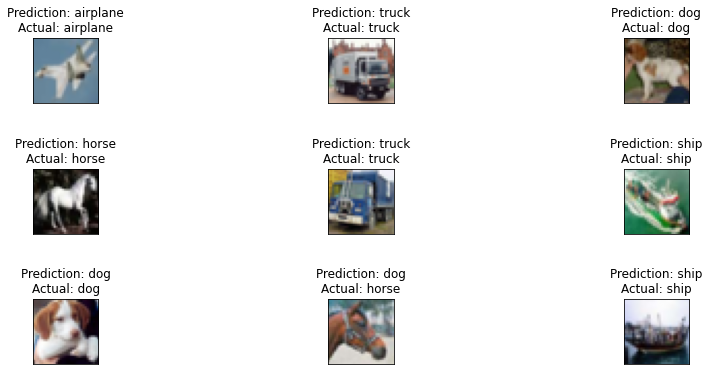

In [105]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = "Prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)

plt.show()